# CHURN_MODELLING PREDICTION

In [1]:
# IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READ DATASET

df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2}).astype(int)
df['Geography'].unique()

array([0, 1, 2])

In [9]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(int)
df['Gender'].unique()

array([0, 1])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = df.iloc[ : , :-1]
Y = df.iloc[ : ,-1]
X.shape,Y.shape

((10000, 10), (10000,))

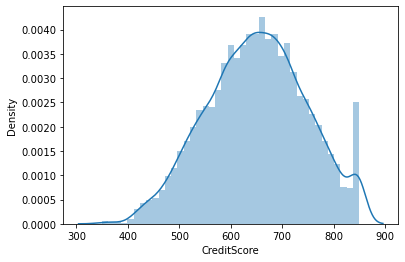

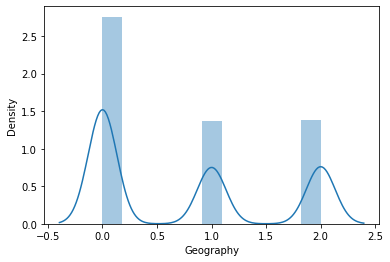

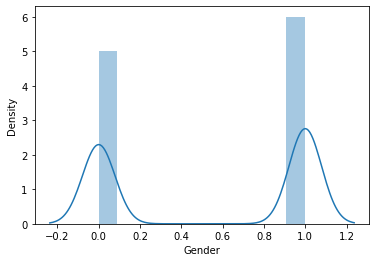

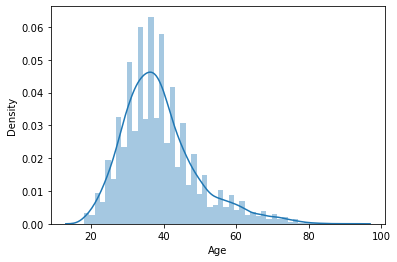

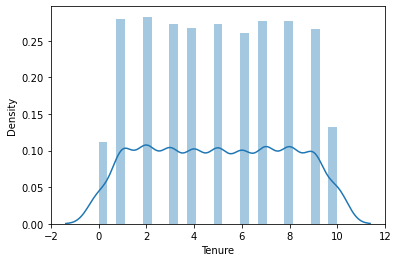

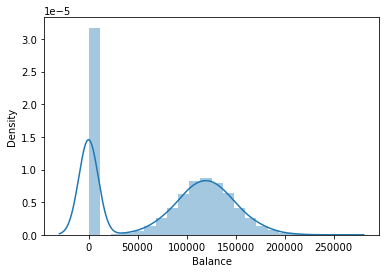

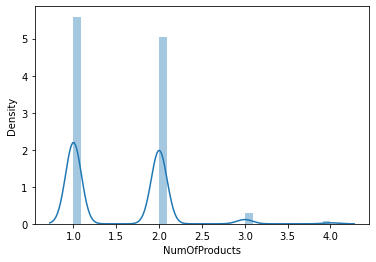

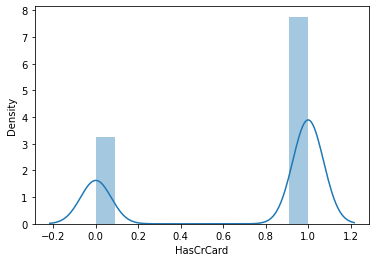

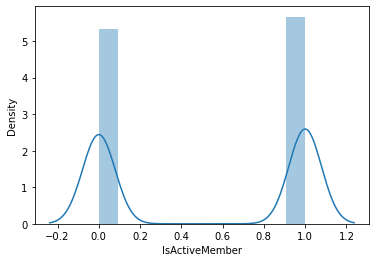

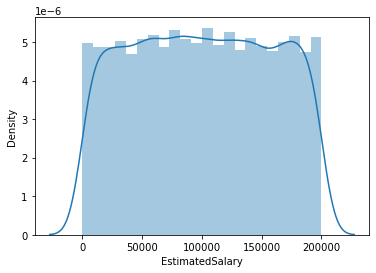

In [14]:
for i in X.columns:
    sb.distplot(X[i])
    plt.show()

In [15]:
# SPLITTING DATA

from sklearn.model_selection import train_test_split as tts

X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.33,random_state = 42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((6700, 10), (6700,), (3300, 10), (3300,))

In [20]:
# IMPLEMENTING MODEL

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression()

In [21]:
# TRAINING ACCURACY

y_train_pred = reg.predict(X_train)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(Y_train,y_train_pred)

0.7847761194029851

In [22]:
# TEST ACCURACY

y_test_pred = reg.predict(X_test)

accuracy_score(Y_test,y_test_pred)

0.8015151515151515